In [30]:
#load libraries

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix

In [2]:
#load dataset

digits = datasets.load_digits()

#quick look

digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

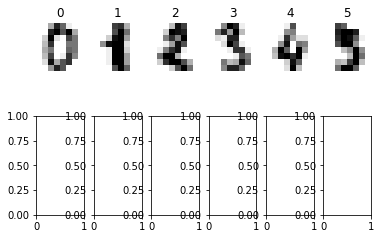

In [3]:
# The dataset is made of 8x8 images of digits
#we could load them using matplotlib.pyplot.imread.

_, axes = plt.subplots(2, 6)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:6]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('%i' % label)
	

In [4]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))#-1 means take all the columns

In [5]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5)

# neuron network

### ususally deal with complex situation

In [34]:
classifier=MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
classifier.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [35]:
y_pred = classifier.predict(X_test)

In [36]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[78  0  0  0  0  0  0  2  0  0]
 [ 0 83  4  0  0  0  0  0  3  3]
 [ 0  2 78  4  0  0  0  0  1  0]
 [ 0  1  2 71  0  1  0  0  5  5]
 [ 0  1  0  0 88  0  0  2  0  0]
 [ 0  0  0  0  0 89  2  1  1 10]
 [ 0  4  1  0  0  1 80  0  3  0]
 [ 2  0  0  0  2  0  0 84  1  1]
 [ 0  7  1  2  0  2  1  2 74  2]
 [ 2  2  0  2  1  7  0  2  0 76]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        80
           1       0.83      0.89      0.86        93
           2       0.91      0.92      0.91        85
           3       0.90      0.84      0.87        85
           4       0.97      0.97      0.97        91
           5       0.89      0.86      0.88       103
           6       0.96      0.90      0.93        89
           7       0.90      0.93      0.92        90
           8       0.84      0.81      0.83        91
           9       0.78      0.83      0.80        92

    accuracy                           0.89       899
   macro avg       

# KNN

In [37]:
classifier = KNeighborsClassifier(n_neighbors=12)

In [38]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [39]:
prediction = classifier.predict(X_test)

In [40]:
confusion_matrix(y_test, prediction)

array([[80,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 93,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 83,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 80,  0,  2,  0,  1,  2,  0],
       [ 0,  1,  0,  0, 89,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1, 99,  1,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 89,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 90,  0,  0],
       [ 0, 11,  0,  3,  0,  0,  0,  1, 76,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  2,  0, 89]])

In [41]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        80
           1       0.89      1.00      0.94        93
           2       1.00      0.98      0.99        85
           3       0.96      0.94      0.95        85
           4       0.98      0.98      0.98        91
           5       0.98      0.96      0.97       103
           6       0.99      1.00      0.99        89
           7       0.95      1.00      0.97        90
           8       0.96      0.84      0.89        91
           9       0.98      0.97      0.97        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899

